# NCC


## Data

In [1]:
import numpy as np
from numpy import linalg as LA
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split


In [2]:
X,y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)


In [3]:
def revamp(X):
    X_out = np.zeros(np.shape(X))
    for i in range(len(X)):
        for j in range(len(X[1])):
            value = X[i][j]
            if value < 5.0:
                X_out[i][j] = 0 #'DARK'
            elif value > 10.0:
                X_out[i][j] = 2 #'LIGHT'
            else:
                X_out[i][j] = 1 #'GRAY'
    return X_out
#Summerised into 0,1,2 aka DARK, LIGHT, GRAY
X_train_sum = revamp(X_train)
X_test_sum = revamp(X_test)

In [4]:
import MNIST
mnist = MNIST.MNISTData('MNIST_Light/*/*.png')
train_features, test_features, train_labels, test_labels = mnist.get_data()

## Classifier

In [5]:
class NCC:
    def __init__(self,nbr_classes, sample_size):
        self.nbr_classes = nbr_classes
        self.sample_size = sample_size
        self.cent_mean = np.zeros((nbr_classes,sample_size))
    
    def fit(self, X, y):
        count = np.zeros(self.nbr_classes)
        for i in range(len(y)):
            for j in range(len(X[i])):
                self.cent_mean[y[i]][j] += X[i][j]
                count[y[i]] += 1
        for i in range(self.nbr_classes):
            self.cent_mean[i] /= count[i]
    
    def prediction(self, X):
        y = np.zeros(len(X))
        for i in range(len(y)):
            dist = np.zeros(self.nbr_classes)
            for j in range(len(dist)):
                dist[j] = LA.norm(X[i]-self.cent_mean[j])
            y[i] = np.argmin(dist)
        return y

## Digits

In [6]:
ncc_dig = NCC(10,len(X_test[1]))
ncc_dig.fit(X_train,y_train)
y_pred = ncc_dig.prediction(X_test)


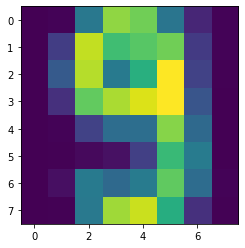

In [7]:
import matplotlib.pyplot as plt
im = np.reshape(ncc_dig.cent_mean[9],(8,8))
plt.imshow(im)

In [8]:
print("Classification report NCC digits:\n%s\n"
          % (metrics.classification_report(y_test, y_pred)))
print("Confusion matrix NCC digits:\n%s" % metrics.confusion_matrix(y_test, y_pred))

Classification report NCC digits:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        49
           1       0.85      0.78      0.81        64
           2       0.94      0.87      0.91        55
           3       0.96      0.92      0.94        50
           4       0.89      0.92      0.91        52
           5       1.00      0.79      0.88        52
           6       0.92      0.95      0.94        64
           7       0.89      0.93      0.91        54
           8       0.64      0.95      0.77        38
           9       0.84      0.77      0.81        62

    accuracy                           0.88       540
   macro avg       0.89      0.89      0.88       540
weighted avg       0.89      0.88      0.88       540


Confusion matrix NCC digits:
[[48  0  0  0  1  0  0  0  0  0]
 [ 0 50  2  0  0  0  4  0  5  3]
 [ 1  2 48  1  0  0  0  1  2  0]
 [ 0  0  1 46  0  0  0  2  1  0]
 [ 0  3  0  0 48  0  0  1  0  0]
 [ 1  0  0  

## Digits summerised

In [9]:
ncc_dig2 = NCC(10,len(X_test[1]))
ncc_dig2.fit(X_train_sum, y_train)
y_pred = ncc_dig2.prediction(X_test_sum)

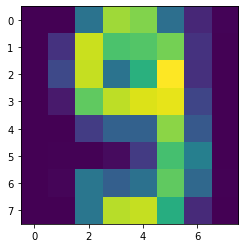

In [10]:
import matplotlib.pyplot as plt
im = np.reshape(ncc_dig2.cent_mean[9],(8,8))
plt.imshow(im)

In [11]:
print("Classification report NCC digits (summarised):\n%s\n"
          % (metrics.classification_report(y_test, y_pred)))
print("Confusion matrix NCC digits (summarised):\n%s" % metrics.confusion_matrix(y_test, y_pred))

Classification report NCC digits (summarised):
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        49
           1       0.84      0.64      0.73        64
           2       0.96      0.80      0.87        55
           3       0.94      0.90      0.92        50
           4       0.91      0.92      0.91        52
           5       1.00      0.77      0.87        52
           6       0.90      0.95      0.92        64
           7       0.91      0.89      0.90        54
           8       0.54      1.00      0.70        38
           9       0.78      0.73      0.75        62

    accuracy                           0.85       540
   macro avg       0.86      0.86      0.85       540
weighted avg       0.87      0.85      0.85       540


Confusion matrix NCC digits (summarised):
[[49  0  0  0  0  0  0  0  0  0]
 [ 0 41  2  0  0  0  5  0 12  4]
 [ 2  3 44  1  0  0  1  1  3  0]
 [ 0  0  0 45  0  0  0  1  3  1]
 [ 0  3  0  0 48  0

## MNIST_light

In [12]:
ncc_mnist = NCC(10,len(train_features[1]))
ncc_mnist.fit(train_features, train_labels)
pred_labels = ncc_mnist.prediction(test_features)

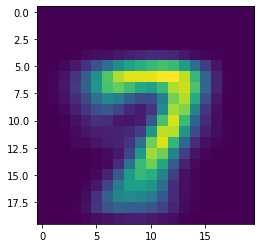

In [13]:
import matplotlib.pyplot as plt
im = np.reshape(ncc_mnist.cent_mean[4],(20,20))
plt.imshow(im)

In [14]:
print("Classification report NCC:\n%s\n"
          % (metrics.classification_report(test_labels, pred_labels)))
print("Confusion matrix NCC:\n%s" % metrics.confusion_matrix(test_labels, pred_labels))

Classification report NCC:
              precision    recall  f1-score   support

           0       0.42      0.98      0.59       164
           1       1.00      0.28      0.44       152
           2       0.84      0.66      0.74       155
           3       0.79      0.67      0.73       154
           4       0.97      0.48      0.64       143
           5       0.00      0.00      0.00       141
           6       0.86      0.85      0.86       143
           7       0.97      0.66      0.78       158
           8       0.29      0.87      0.43       132
           9       0.75      0.51      0.61       158

    accuracy                           0.60      1500
   macro avg       0.69      0.60      0.58      1500
weighted avg       0.70      0.60      0.59      1500


Confusion matrix NCC:
[[161   0   1   0   0   0   0   0   2   0]
 [  0  43   0   0   0   0   1   0 108   0]
 [ 20   0 102   5   0   0   7   0  21   0]
 [ 21   0   3 103   0   0   1   1  25   0]
 [ 19   0   1   0  

C:\Users\Victor\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
